In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
df = pd.read_csv('drug_G2.csv')

In [160]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [161]:
df['Sex'].unique(),df['BP'].unique(),df['Cholesterol'].unique(), df['Drug'].unique()

(array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object))

In [162]:
df['Sex'] = df['Sex'].map({'F':1,'M':0})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY


In [163]:
df['BP'] = df['BP'].map({'HIGH':2,'NORMAL':1,'LOW':0})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,HIGH,25.355,drugY
1,47,0,0,HIGH,13.093,drugC
2,47,0,0,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,0,HIGH,18.043,drugY


In [164]:

df['Cholesterol'] =df['Cholesterol'].map({'HIGH':1,'NORMAL':0})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,0,1,13.093,drugC
2,47,0,0,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,0,1,18.043,drugY


In [165]:
df['Drug'] =df['Drug'].map({'drugY':1, 'drugC':2, 'drugX':3, 'drugA':4, 'drugB':5})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,1
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,1


In [166]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [167]:
df.shape

(200, 6)

In [168]:
df.Drug.value_counts()

1    91
3    54
4    23
2    16
5    16
Name: Drug, dtype: int64

In [169]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 1/3, random_state=42)

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
regressor = LinearRegression()

In [174]:
regressor.fit(X_train,y_train)

LinearRegression()

In [175]:
y_pred = regressor.predict(X_test)

In [176]:
from sklearn.metrics import mean_squared_error

In [177]:
mse = mean_squared_error(y_pred,y_test)

In [178]:
mse

0.8343483093902887

In [179]:
import math


In [180]:
rmse =  math.sqrt(mse)
rmse

0.9134266852847517

In [181]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [182]:
clf = DecisionTreeClassifier()

In [183]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [184]:
y_pred = clf.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [186]:
accuracy_score(y_pred,y_test)

1.0

In [187]:
confusion_matrix(y_pred,y_test)

array([[30,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0, 19,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  4]], dtype=int64)

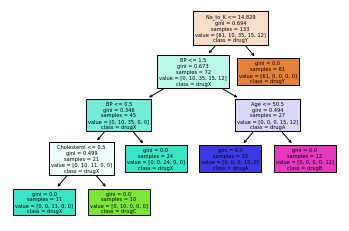

In [192]:
_=tree.plot_tree(clf,feature_names = X.columns, class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],filled =True)

In [193]:
from sklearn.neighbors import KNeighborsClassifier 

In [194]:
knc = KNeighborsClassifier()

In [199]:
arr=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    arr.append(np.mean(pred_i != y_test))

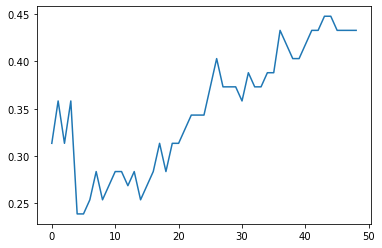

In [200]:
plt.plot(arr)
plt.show()

In [201]:
from sklearn.svm import SVC

In [210]:
clf = SVC(kernel = 'sigmoid')

In [211]:
clf.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [212]:
y_pred = clf.predict(X_test)

In [213]:
accuracy_score(y_pred,y_test)

0.417910447761194

In [214]:
from sklearn.naive_bayes import GaussianNB

In [216]:
clf = GaussianNB()

In [217]:
clf.fit(X_train,y_train)

GaussianNB()

In [218]:
y_pred = clf.predict(X_test)

In [219]:
accuracy_score(y_pred,y_test)

0.8955223880597015

In [220]:
from sklearn.linear_model import Perceptron

In [224]:
pp = Perceptron(tol =1e-3, random_state= 42)

In [225]:
pp.fit(X_train,y_train)
y_pred = pp.predict(X_test)

In [226]:
accuracy_score(y_pred,y_test)

0.4925373134328358

In [227]:
from sklearn.neural_network import MLPClassifier

In [232]:
clf= MLPClassifier(hidden_layer_sizes=(20,20))

In [233]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.4626865671641791

In [234]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [243]:
arr=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    arr.append(kmeans.inertia_)

In [244]:
!curl https://tinyurl.com/Chetan123456 -L|clip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   506    0   506    0     0    339      0 --:--:--  0:00:01 --:--:--   343
100   506    0   506    0     0    339      0 --:--:--  0:00:01 --:--:--   343

100  1921  100  1921    0     0   1010      0  0:00:01  0:00:01 --:--:--  1010


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_absolute_error,mean_squared_error
from category_encoders import OneHotEncoder
from category_encoders import BinaryEncoder
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
from category_encoders import LeaveOneOutEncoder
from category_encoders import BaseNEncoder
from sklearn.preprocessing import LabelEncoder


# Creating a multilayer neural network

# 1. Create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='tanh'),
    tf.keras.layers.Dense(5,activation='tanh'),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# 3. Fit the model
model.fit(X_train,y_train,epochs=50)
